In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
scores_df = pd.DataFrame(columns=['model', 'train_score', 'test_score'])
# scores_df = scores_df._append({'model':'Test', 'train_score':4, 'test_score':5}, ignore_index=True)

In [52]:
data = pd.read_csv('master_df_reduced.csv')
X = data[
    ['Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'Average Income', 'pop_total']
]
# X = data[
#     ['Focal Depth (km)', 'Mag', 'Average Income', 'pop_total']
# ]
y = data['badness_value']

# X = np.array(X)
# y = np.array(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_train, y_train)

0.16278159238529655

In [56]:
lin_reg.score(X_test, y_test)

0.11516642340276362

In [57]:
scores_df = scores_df._append(
    {
        'model': 'Linear Regression',
        'train_score': lin_reg.score(X_train, y_train),
        'test_score': lin_reg.score(X_test, y_test),
    },
    ignore_index=True,
)

/var/folders/wr/nnzrl8p15wd8_8sccj0_s_rc0000gn/T/ipykernel_51038/2323344453.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = scores_df._append(


In [58]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend

In [59]:
with parallel_backend('threading', n_jobs=10):
    parameters = {
        'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
        'C': np.logspace(-1, 2, 5),
    }
    SVR_reg = SVR()
    SVR_opt = GridSearchCV(SVR_reg, param_grid=parameters)
    SVR_opt.fit(X, y)

In [60]:
SVR_opt.best_params_

{'C': 0.5623413251903491, 'kernel': 'rbf'}

In [61]:
# SVR_reg = SVR(C=15)
with parallel_backend('threading', n_jobs=10):
    SVR_opt.fit(X_train, y_train)
SVR_opt.score(X_train, y_train)

0.4906771823432269

In [62]:
SVR_opt.score(X_test, y_test)

0.3383565712263107

In [63]:
scores_df = scores_df._append(
    {
        'model': 'SVR',
        'train_score': SVR_opt.score(X_train, y_train),
        'test_score': SVR_opt.score(X_test, y_test),
    },
    ignore_index=True,
)

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
with parallel_backend('threading', n_jobs=10):
    parameters = {
        'n_estimators': np.linspace(5, 500, 10).round().astype(int),
        'max_depth': np.linspace(5, 100, 10).round().astype(int),
        'min_samples_split': [2, 4, 10],
    }
    RF_reg = RandomForestRegressor()
    RF_opt = GridSearchCV(RF_reg, param_grid=parameters)
    RF_opt.fit(X, y)

In [66]:
with parallel_backend('threading', n_jobs=10):
    RF_opt.fit(X_train, y_train)
RF_opt.score(X_train, y_train)

0.8999055104966156

In [67]:
RF_opt.score(X_test, y_test)

0.35657713052858664

In [68]:
scores_df = scores_df._append(
    {
        'model': 'Random Forest Regression',
        'train_score': RF_opt.score(X_train, y_train),
        'test_score': RF_opt.score(X_test, y_test),
    },
    ignore_index=True,
)

In [69]:
scores_df_melt = scores_df.melt(
    id_vars=['model'],
    value_vars=['train_score', 'test_score'],
    value_name='score',
    var_name='set',
)

In [70]:
import seaborn as sns

<Axes: xlabel='model', ylabel='score'>

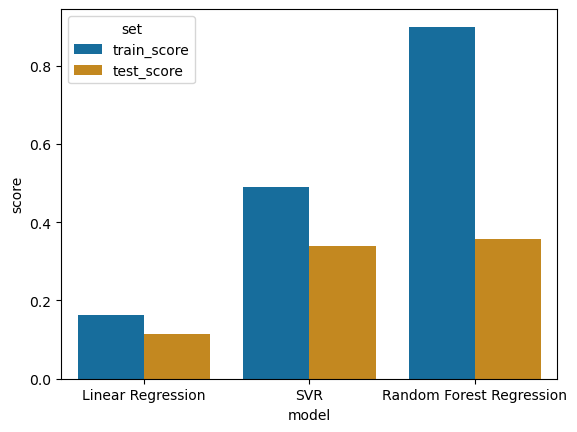

In [71]:
sns.barplot(scores_df_melt, x='model', y='score', hue='set', palette="colorblind")